# 데이터 전처리 1
1. 한글은 전부 영어로 변환
2. train.csv와 building_info.csv를 건물번호를 기준으로 병합
3. train.csv에서 num_date_time = 건물번호 + 일시, 중복된 데이터이므로 열 제거
4. date_time 을 년, 월, 주, 시간으로 분리

In [176]:
# module import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# 폰트 설정
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['font.sans-serif'] = ['NanumGothic']
mpl.rc('font', size=10)  # 원하는 폰트 크기 설정

In [113]:
train_df = pd.read_csv('../data/train.csv')
building_info = pd.read_csv('../data/building_info.csv')

In [6]:
# data set check
train_df.head()

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
0,1_20220601 00,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28
1,1_20220601 01,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36
2,1_20220601 02,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88
3,1_20220601 03,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76
4,1_20220601 04,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40


In [5]:
building_info.head()

,건물번호,건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
0,1,건물기타,110634.00,39570.00,-,-,-
1,2,건물기타,122233.47,99000.00,-,-,-
2,3,건물기타,171243.00,113950.00,40,-,-
3,4,건물기타,74312.98,34419.62,60,-,-
4,5,건물기타,205884.00,150000.00,-,2557,1000


In [114]:
# rename kor to eng
train_df = train_df.rename(columns={
    '건물번호': 'building_id',
    '일시': 'date_time',
    '기온(C)': 'temp',
    '강수량(mm)': 'rainfall',
    '풍속(m/s)': 'windspeed',
    '습도(%)': 'humidity',
    '일조(hr)': 'sunshine',
    '일사(MJ/m2)': 'solar_radiation',
    '전력소비량(kWh)': 'power_consumption',
})
train_df.drop('num_date_time', axis=1, inplace=True)
train_df.head()

,building_id,date_time,temp,rainfall,windspeed,humidity,sunshine,solar_radiation,power_consumption
0,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28
1,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36
2,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88
3,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76
4,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40


In [115]:
building_info = building_info.rename(columns={
    '건물번호': 'building_id',
    '건물유형': 'building_type',
    '연면적(m2)': 'total_area',
    '냉방면적(m2)': 'cooling_area',
    '태양광용량(kW)': 'solar_power_cap',
    'ESS저장용량(kWh)': 'ess_cap',
    'PCS용량(kW)': 'pcs_cap',
})
translation_dict = {
    '건물기타': 'Other Buildings',
    '공공': 'Public',
    '대학교': 'University',
    '데이터센터': 'Data Center',
    '백화점및아울렛': 'Department Store and Outlet',
    '병원': 'Hospital',
    '상용': 'Commercial',
    '아파트': 'Apartment',
    '연구소': 'Research Institute',
    '지식산업센터': 'Knowledge Industry Center',
    '할인마트': 'Discount Mart',
    '호텔및리조트': 'Hotel and Resort'
}
building_info['building_type'] = building_info['building_type'].replace(translation_dict)
building_info.head()

,building_id,building_type,total_area,cooling_area,solar_power_cap,ess_cap,pcs_cap
0,1,Other Buildings,110634.00,39570.00,-,-,-
1,2,Other Buildings,122233.47,99000.00,-,-,-
2,3,Other Buildings,171243.00,113950.00,40,-,-
3,4,Other Buildings,74312.98,34419.62,60,-,-
4,5,Other Buildings,205884.00,150000.00,-,2557,1000


In [116]:
train_df = pd.merge(train_df, building_info, on='building_id', how='left')

In [6]:
train_df.head()

,building_id,date_time,temp,rainfall,windspeed,humidity,sunshine,solar_radiation,power_consumption,building_type,total_area,cooling_area,solar_power_cap,ess_cap,pcs_cap
0,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28,Other Buildings,110634.0,39570.0,-,-,-
1,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36,Other Buildings,110634.0,39570.0,-,-,-
2,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88,Other Buildings,110634.0,39570.0,-,-,-
3,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76,Other Buildings,110634.0,39570.0,-,-,-
4,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40,Other Buildings,110634.0,39570.0,-,-,-


In [117]:
train_df['date_time'] = pd.to_datetime(train_df['date_time'], format='%Y%m%d %H')
train_df['hour'] = train_df['date_time'].dt.hour
train_df['day'] = train_df['date_time'].dt.day
train_df['month'] = train_df['date_time'].dt.month
train_df['year'] = train_df['date_time'].dt.year
train_df.head()

,building_id,date_time,temp,rainfall,windspeed,humidity,sunshine,solar_radiation,power_consumption,building_type,total_area,cooling_area,solar_power_cap,ess_cap,pcs_cap,hour,day,month,year
0,1,2022-06-01 00:00:00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28,Other Buildings,110634.0,39570.0,-,-,-,0,1,6,2022
1,1,2022-06-01 01:00:00,18.0,NaN,1.1,45.0,NaN,NaN,1047.36,Other Buildings,110634.0,39570.0,-,-,-,1,1,6,2022
2,1,2022-06-01 02:00:00,17.7,NaN,1.5,45.0,NaN,NaN,974.88,Other Buildings,110634.0,39570.0,-,-,-,2,1,6,2022
3,1,2022-06-01 03:00:00,16.7,NaN,1.4,48.0,NaN,NaN,953.76,Other Buildings,110634.0,39570.0,-,-,-,3,1,6,2022
4,1,2022-06-01 04:00:00,18.4,NaN,2.8,43.0,NaN,NaN,986.40,Other Buildings,110634.0,39570.0,-,-,-,4,1,6,2022


# 데이터 전처리 2
1. 결측치 check
2. outlier check

In [8]:
train_df.isna().sum()

building_id               0
date_time                 0
temp                      0
rainfall             160069
windspeed                19
humidity                  9
sunshine              75182
solar_radiation       87913
power_consumption         0
building_type             0
total_area                0
cooling_area              0
solar_power_cap           0
ess_cap                   0
pcs_cap                   0
hour                      0
day                       0
month                     0
year                      0
dtype: int64

In [9]:
len(train_df)

204000

In [10]:
print(len(train_df[train_df['solar_power_cap'] == '-']))
print(len(train_df[train_df['ess_cap'] == '-']))
print(len(train_df[train_df['pcs_cap'] == '-']))

130560
193800
193800


## 중간정리 (12/07 04:46)

rainfall, ess_cap, pcs_cap => 전체 데이터양에 비해 결측치가 충분히 많으므로 drop

solar_power_cap, sunshine, solar_radiation => 변수의 특성을 확인하고 보간할 방법이 있는지?

++ 일조/일사량의 경우 결측치 양이 적지 않음. 또한 구름, 공기 중의 입자등과 같은 여러가지 요소가 얽혀있음 = 보간하려해도 부정확할 확률이 높음

windspeed, humidity => 보간, 데이터 특성상 풍속과 습도의 경우 결측된 부분의 전후 데이터의 평균으로 보간할 수 있음 (시간상 전후)

~cap 변수들의 경우 건물에 측정 관련 구조물이 없어서 **-** 로 표시된 것일 수도 있음 => 설치여부를 0과 1로 나타낼까?

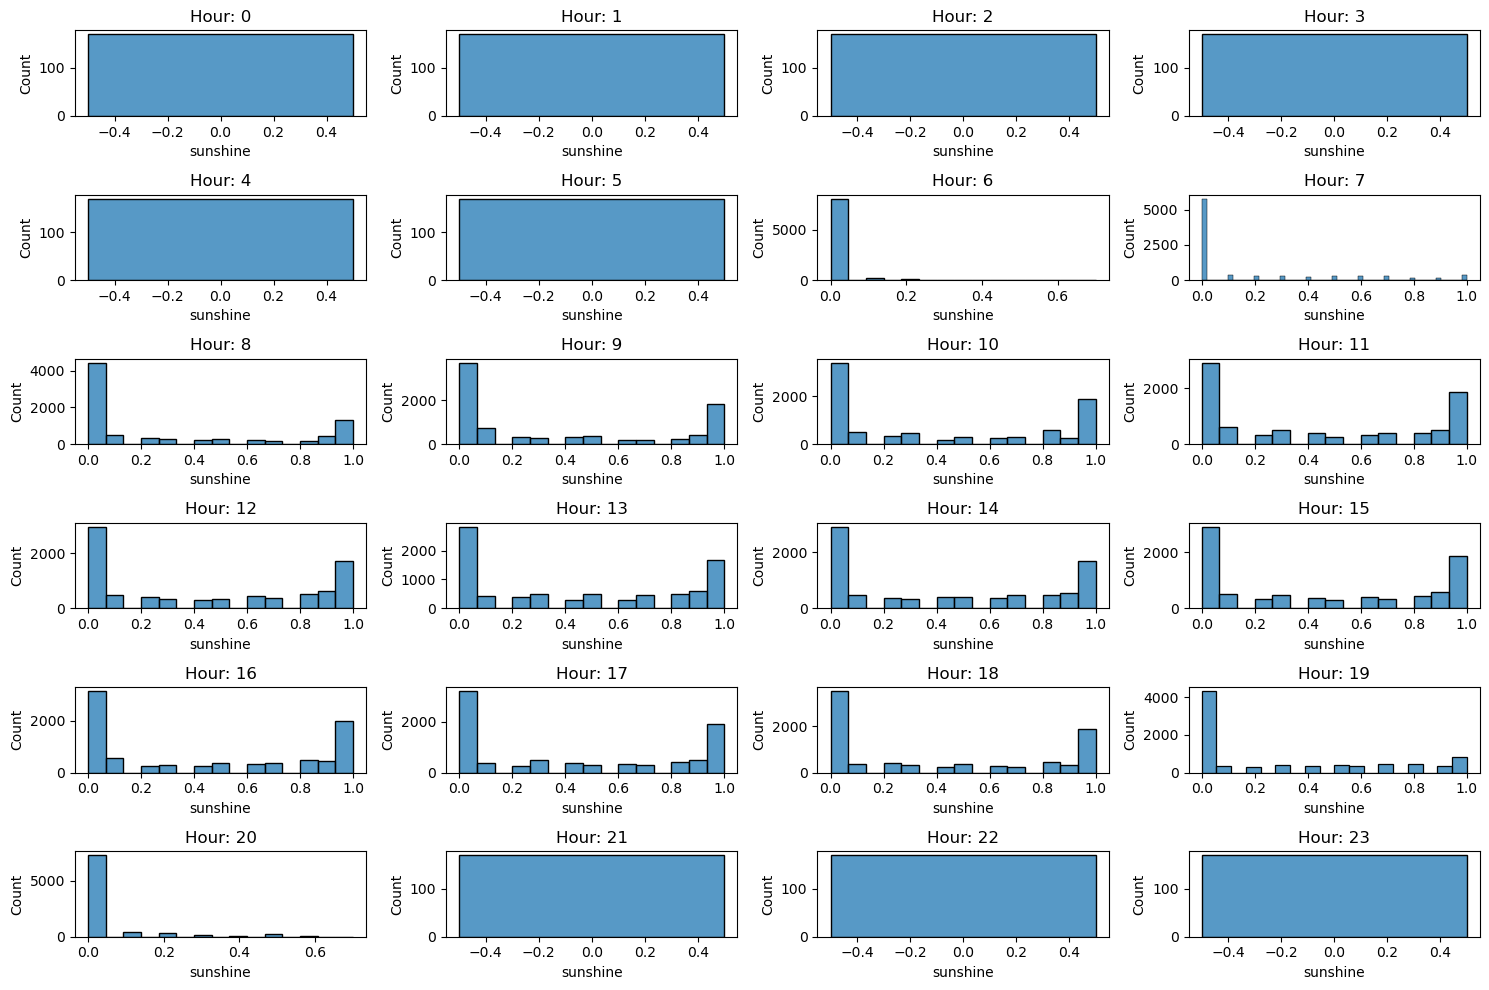

In [29]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(6, 4, figsize=(15, 10))
axs = axs.ravel()

for i in range(24):
    sns.histplot(train_df[train_df.hour == i]['sunshine'], ax=axs[i])
    axs[i].set_title(f'Hour: {i}')

plt.tight_layout()

<Axes: xlabel='rainfall', ylabel='Count'>

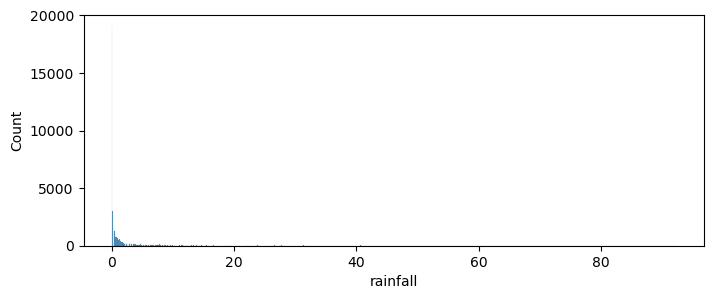

In [37]:
plt.figure(figsize=(8, 3))
sns.histplot(train_df['rainfall'])

sunshin, solar_radiation: 정확하게 보간할 수 있는 방법이 없다고 판단 => drop  
rainfall: 대부분의 데이터가 0임 => .fillna(0)  
solar_power_cap, ess_cap, pcs_cap: 측정도구가 없지만 0으로 채우는 것이 맞는가? => X라고 판단

In [118]:
train_df = train_df.drop(['solar_power_cap', 'ess_cap', 'pcs_cap', 'sunshine', 'solar_radiation'], axis=1)

In [119]:
train_df['rainfall'].fillna(0, inplace=True)

In [48]:
train_df.isna().sum()

building_id           0
date_time             0
temp                  0
rainfall              0
windspeed            19
humidity              9
power_consumption     0
building_type         0
total_area            0
cooling_area          0
hour                  0
day                   0
month                 0
year                  0
dtype: int64

windspeed, humidity의 경우 값을 어떻게 보간할까?
=> 근처 값으로 덮기 or 값 평균 뭐가 더 나을지에 대한 고민

<Axes: xlabel='windspeed', ylabel='Count'>

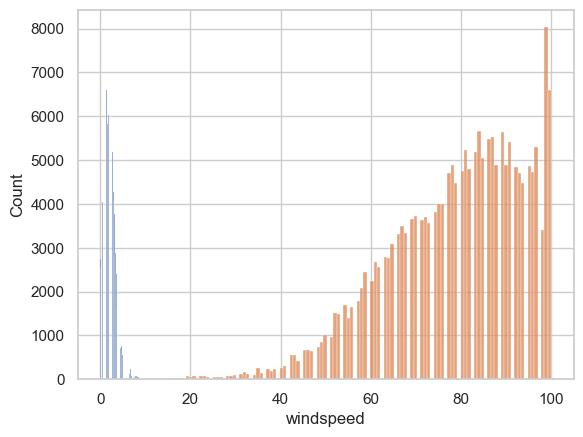

In [120]:
sns.histplot(train_df['windspeed'])
sns.histplot(train_df['humidity'])

In [121]:
train_df['windspeed'].fillna(method='ffill', inplace=True)
train_df['humidity'].fillna(method='ffill', inplace=True)

In [122]:
train_df.isna().sum()

building_id          0
date_time            0
temp                 0
rainfall             0
windspeed            0
humidity             0
power_consumption    0
building_type        0
total_area           0
cooling_area         0
hour                 0
day                  0
month                0
year                 0
dtype: int64

## EDA & 조정

In [123]:
# 년기준 일 평균 소비전력
train_df['day_of_year'] = train_df['date_time'].dt.dayofyear
mean_power_by_day_of_year = train_df.groupby('day_of_year')['power_consumption'].mean()
# 년기준 시간평균 소비전력
train_df['hour_of_year'] = train_df['date_time'].dt.hour + (train_df['date_time'].dt.dayofyear - 1) * 24
mean_power_by_hour_of_year = train_df.groupby('hour_of_year')['power_consumption'].mean()

# 년기준 월평균 소비전력
mean_power_by_month = train_df.groupby('month')['power_consumption'].mean()

# 일기준 시간 평균 소비전력
mean_power_by_hour = train_df.groupby('hour')['power_consumption'].mean()

# 월기준 시간 평균 소비전력
mean_power_by_day = train_df.groupby('day')['power_consumption'].mean()

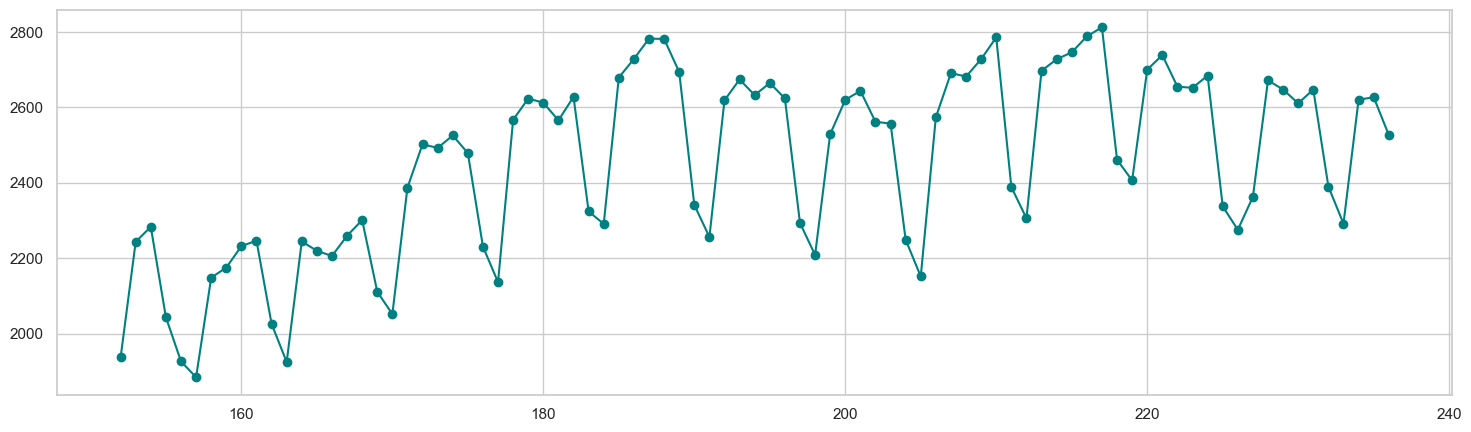

In [124]:
# day of the year에 대한 일 평균 소비전력 그래프
plt.figure(figsize=(18, 5))
sns.set(style="whitegrid")
plt.plot(mean_power_by_day_of_year.index, mean_power_by_day_of_year.values, color='teal', marker='o', linestyle='-')
plt.show()

휴일에 주기적으로 전력소모량이 낮은 것을 확인할 수 있음 => 따로 파생변수 생성

In [125]:
train_df['holiday'] = train_df['day_of_year'].apply(lambda x: True if x % 7 == 1 or x % 7 == 2 else False)

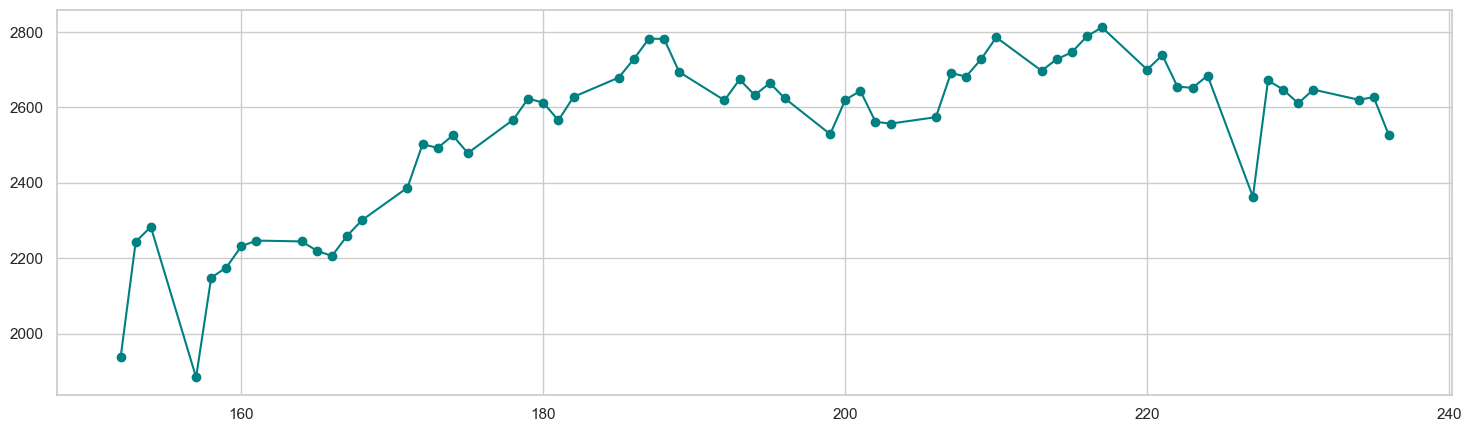

In [126]:
# holiday == False graph
mean_power_by_day_of_year_holidaycut = train_df[train_df['holiday'] == False].groupby('day_of_year')['power_consumption'].mean()

plt.figure(figsize=(18, 5))
sns.set(style="whitegrid")
plt.plot(mean_power_by_day_of_year_holidaycut.index, mean_power_by_day_of_year_holidaycut.values, color='teal', marker='o', linestyle='-')
plt.show()

(6월 1일 지방선거, 6월 6일 현충일, 8월 15일 광복절 == 휴일)에 전력소모량이 낮은 것을 확인할 수 있음 => holiday로 분류

In [127]:
train_df.loc[(train_df['month'] == 6) & (train_df['day'] == 1), 'holiday'] = True
train_df.loc[(train_df['month'] == 6) & (train_df['day'] == 6), 'holiday'] = True
train_df.loc[(train_df['month'] == 8) & (train_df['day'] == 15), 'holiday'] = True

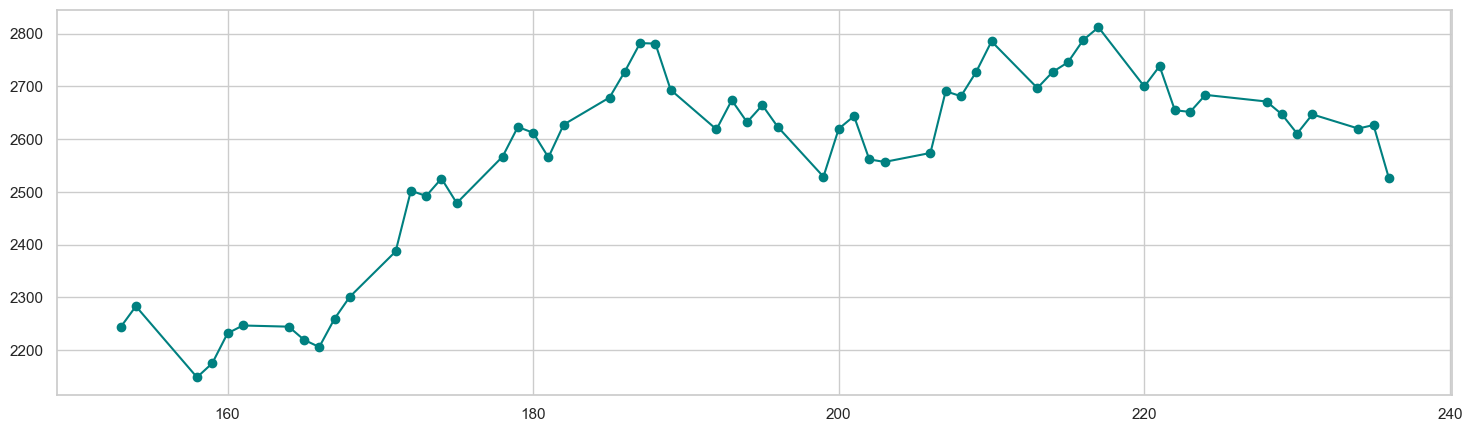

In [128]:
# 법정공휴일 제거
mean_power_by_day_of_year_holidaycut = train_df[train_df['holiday'] == False].groupby('day_of_year')['power_consumption'].mean()

plt.figure(figsize=(18, 5))
sns.set(style="whitegrid")
plt.plot(mean_power_by_day_of_year_holidaycut.index, mean_power_by_day_of_year_holidaycut.values, color='teal', marker='o', linestyle='-')
plt.show()

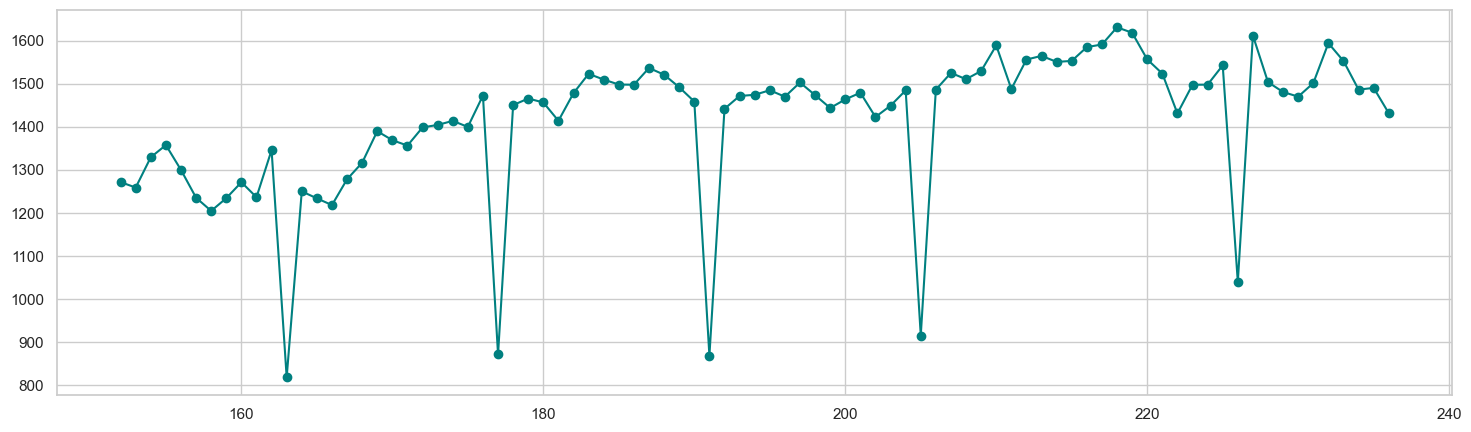

In [129]:
# 대형마트 체크
mean_power_by_day_of_year_market_nh = train_df[(train_df['building_type'] == 'Discount Mart')].groupby('day_of_year')['power_consumption'].mean()

plt.figure(figsize=(18, 5))
sns.set(style="whitegrid")
plt.plot(mean_power_by_day_of_year_market_nh.index, mean_power_by_day_of_year_market_nh.values, color='teal', marker='o', linestyle='-')
plt.show()

대형마트는 주말에도 영업을 함, 단, 2, 4째주 일요일의 경우 휴일이므로 이 부분만 수정

In [130]:
train_df.loc[(train_df['building_type'] == 'Discount Mart') & (train_df['month'] == 6) & (train_df['day'] == 12), 'holiday'] = True
train_df.loc[(train_df['building_type'] == 'Discount Mart') & (train_df['month'] == 6) & (train_df['day'] == 26), 'holiday'] = True
train_df.loc[(train_df['building_type'] == 'Discount Mart') & (train_df['month'] == 7) & (train_df['day'] == 10), 'holiday'] = True
train_df.loc[(train_df['building_type'] == 'Discount Mart') & (train_df['month'] == 7) & (train_df['day'] == 24), 'holiday'] = True
train_df.loc[(train_df['building_type'] == 'Discount Mart') & (train_df['month'] == 8) & (train_df['day'] == 14), 'holiday'] = True

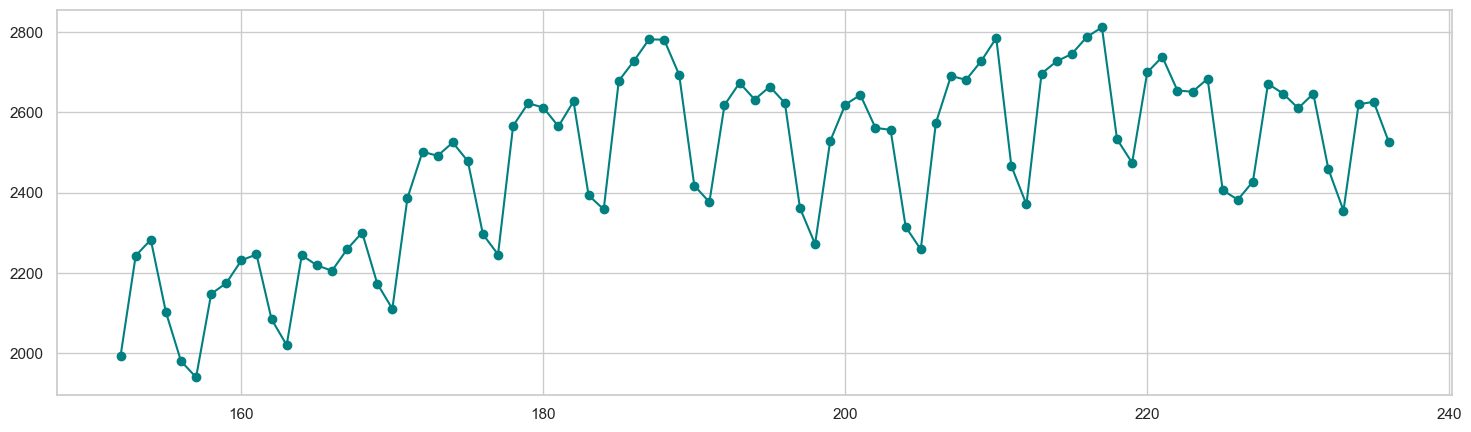

In [131]:
# 휴무일 제거 후
mean_power_by_day_of_year_market_after = train_df[(train_df['building_type'] == 'Discount Mart') & train_df['holiday'] == False].groupby('day_of_year')['power_consumption'].mean()

plt.figure(figsize=(18, 5))
sns.set(style="whitegrid")
plt.plot(mean_power_by_day_of_year_market_after.index, mean_power_by_day_of_year_market_after.values, color='teal', marker='o', linestyle='-')
plt.show()

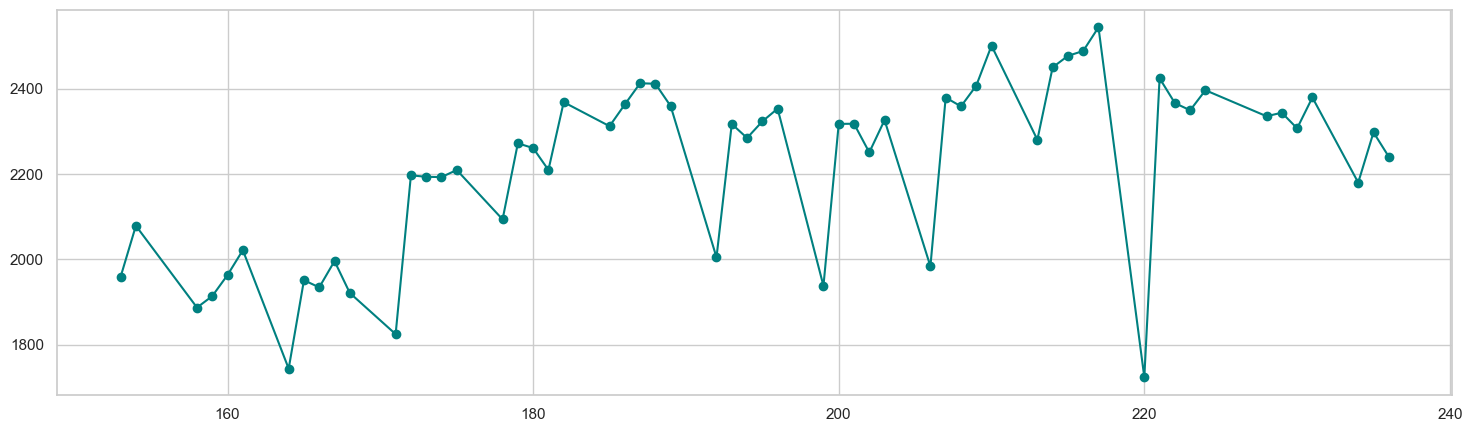

In [152]:
# 백화점 체크
mean_power_by_day_of_year_dp = train_df[(train_df['building_type'] == 'Department Store and Outlet') & (train_df['holiday'] == False)].groupby('day_of_year')['power_consumption'].mean()

plt.figure(figsize=(18, 5))
sns.set(style="whitegrid")
plt.plot(mean_power_by_day_of_year_dp.index, mean_power_by_day_of_year_dp.values, color='teal', marker='o', linestyle='-')
plt.show()

휴일이 아닌데도 현저하게 전력소모량이 낮은 날이 있음 => 임시휴무일

In [157]:
train_df.loc[(train_df['building_type'] == 'Department Store and Outlet') & (train_df['day_of_year'] == 164), 'holiday'] = True
train_df.loc[(train_df['building_type'] == 'Department Store and Outlet') & (train_df['day_of_year'] == 171), 'holiday'] = True
train_df.loc[(train_df['building_type'] == 'Department Store and Outlet') & (train_df['day_of_year'] == 220), 'holiday'] = True

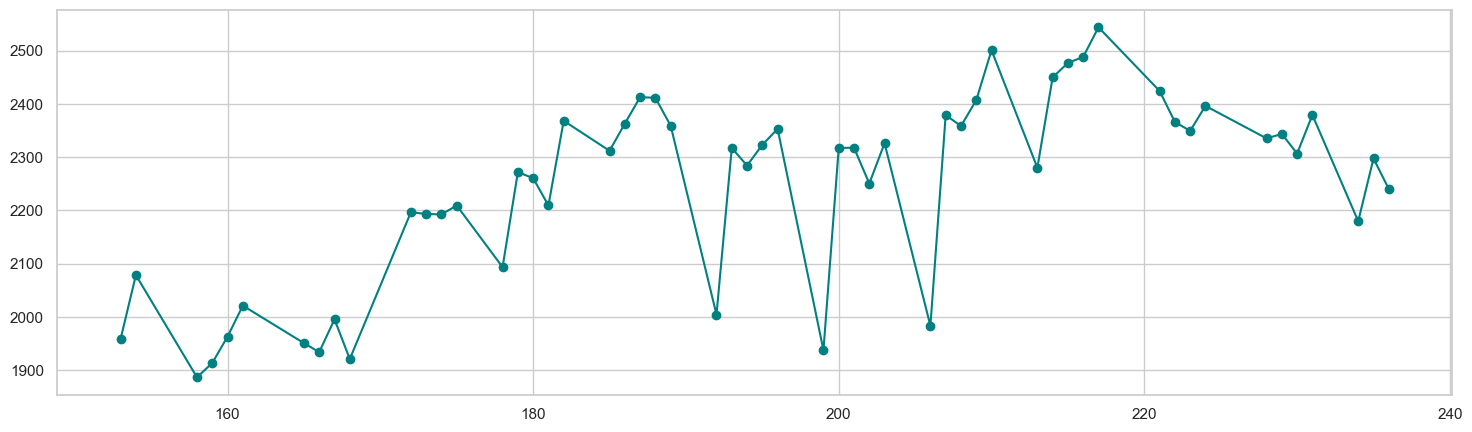

In [158]:
# 백화점 임시휴무일 제거 후
mean_power_by_day_of_year_dp = train_df[(train_df['building_type'] == 'Department Store and Outlet') & (train_df['holiday'] == False)].groupby('day_of_year')['power_consumption'].mean()

plt.figure(figsize=(18, 5))
sns.set(style="whitegrid")
plt.plot(mean_power_by_day_of_year_dp.index, mean_power_by_day_of_year_dp.values, color='teal', marker='o', linestyle='-')
plt.show()

전체적인 그래프 체크

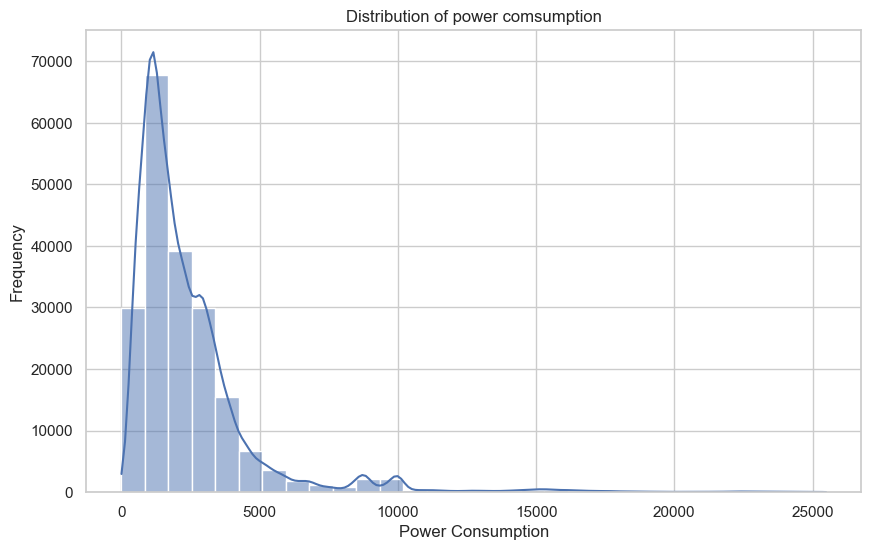

In [160]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['power_consumption'], bins=30, kde=True)
plt.title('Distribution of power comsumption')
plt.xlabel('Power Consumption')
plt.ylabel('Frequency')
plt.show()

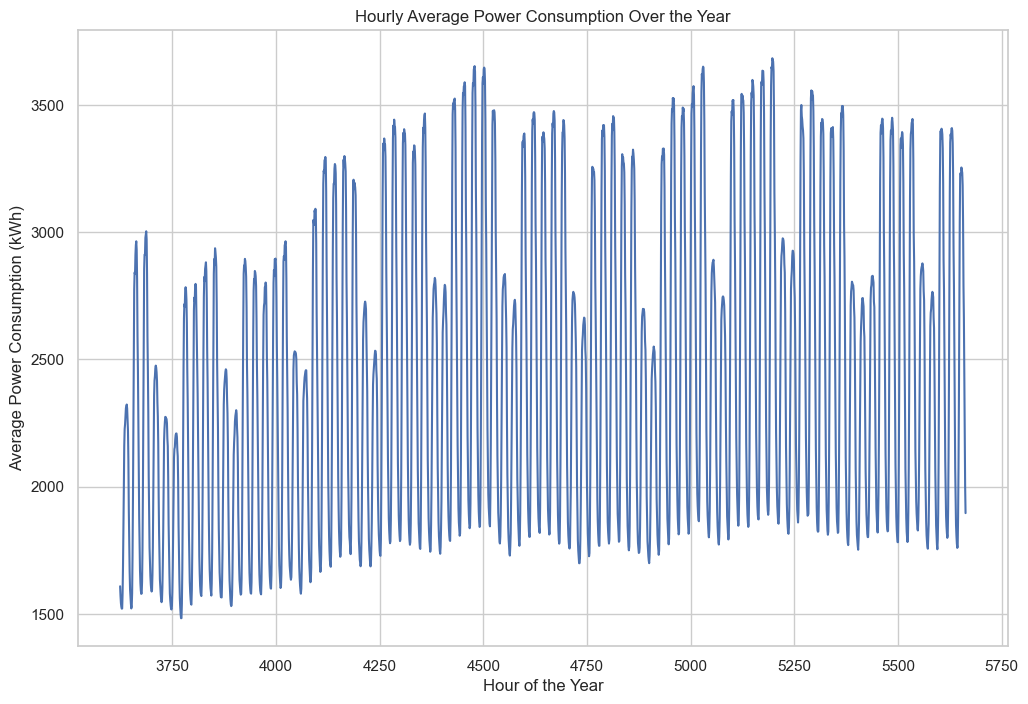

In [161]:
# 년기준 시간평균 소비전력 그래프
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.lineplot(x=mean_power_by_hour_of_year.index, y=mean_power_by_hour_of_year.values)
plt.title('Hourly Average Power Consumption Over the Year')
plt.xlabel('Hour of the Year')
plt.ylabel('Average Power Consumption (kWh)')
plt.show()

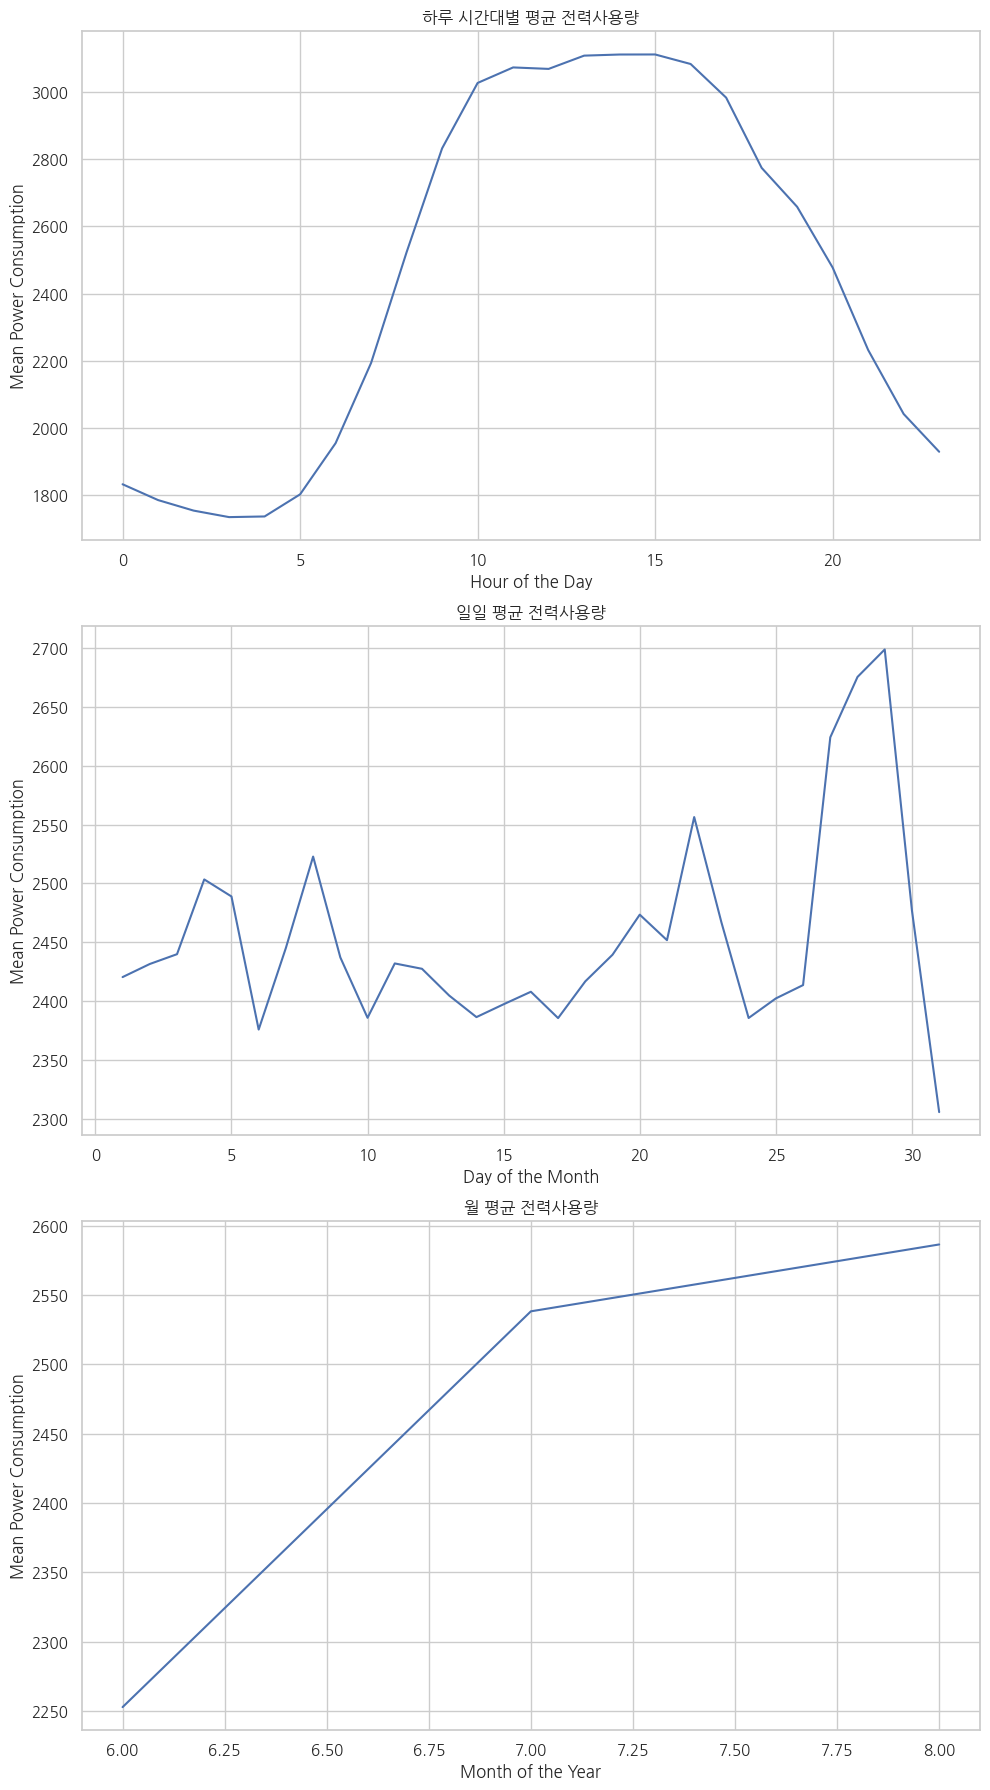

In [182]:
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

# Plot mean power consumption by hour of the day
sns.lineplot(x=mean_power_by_hour.index, y=mean_power_by_hour.values, ax=axs[0])
axs[0].set_title('하루 시간대별 평균 전력사용량')
axs[0].set_xlabel('Hour of the Day')
axs[0].set_ylabel('Mean Power Consumption')

# Plot mean power consumption by day of the month
sns.lineplot(x=mean_power_by_day.index, y=mean_power_by_day.values, ax=axs[1])
axs[1].set_title('일일 평균 전력사용량')
axs[1].set_xlabel('Day of the Month')
axs[1].set_ylabel('Mean Power Consumption')

# 년기준 월평균 소비전력
sns.lineplot(x=mean_power_by_month.index, y=mean_power_by_month.values, ax=axs[2])
axs[2].set_title('월 평균 전력사용량')
axs[2].set_xlabel('Month of the Year')
axs[2].set_ylabel('Mean Power Consumption')

plt.tight_layout()
plt.show()

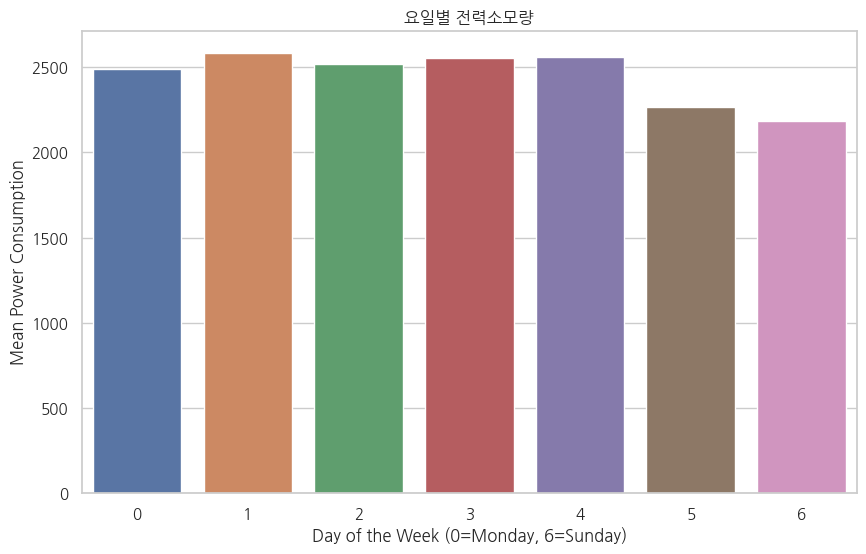

In [181]:
train_df['day_of_week'] = train_df['date_time'].dt.dayofweek

# 요일별 전력평균
mean_power_by_day_of_week = train_df.groupby('day_of_week')['power_consumption'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=mean_power_by_day_of_week.index, y=mean_power_by_day_of_week.values)
plt.title('요일별 전력사용량')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Mean Power Consumption')
plt.show()

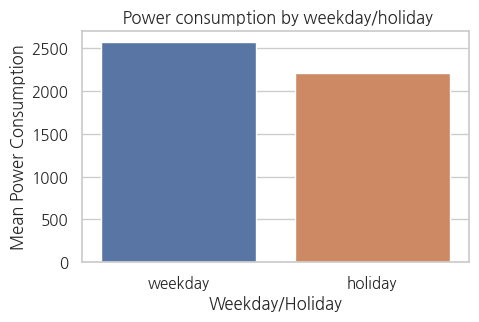

In [202]:
# 평일/휴일 전력사용량 차이
mean_power_by_holiday = train_df.groupby('holiday')['power_consumption'].mean()

plt.figure(figsize=(5, 3))
sns.barplot(x=mean_power_by_holiday.index, y=mean_power_by_holiday.values)
plt.xticks([0, 1], ['weekday', 'holiday'])
plt.title(' Power consumption by weekday/holiday')
plt.xlabel('Weekday/Holiday')
plt.ylabel('Mean Power Consumption')
plt.show()

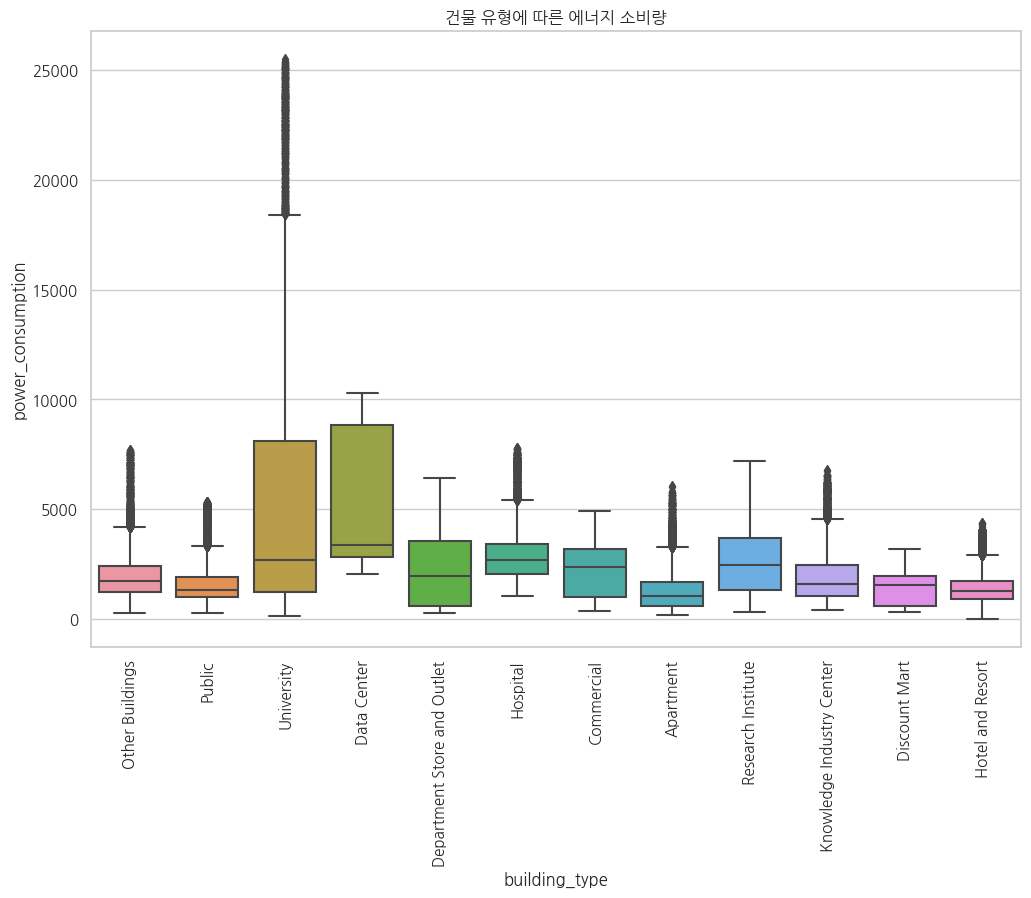

In [186]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='building_type', y='power_consumption', data=train_df)
plt.title('건물 유형에 따른 에너지 소비량')
plt.xticks(rotation=90)
plt.show()

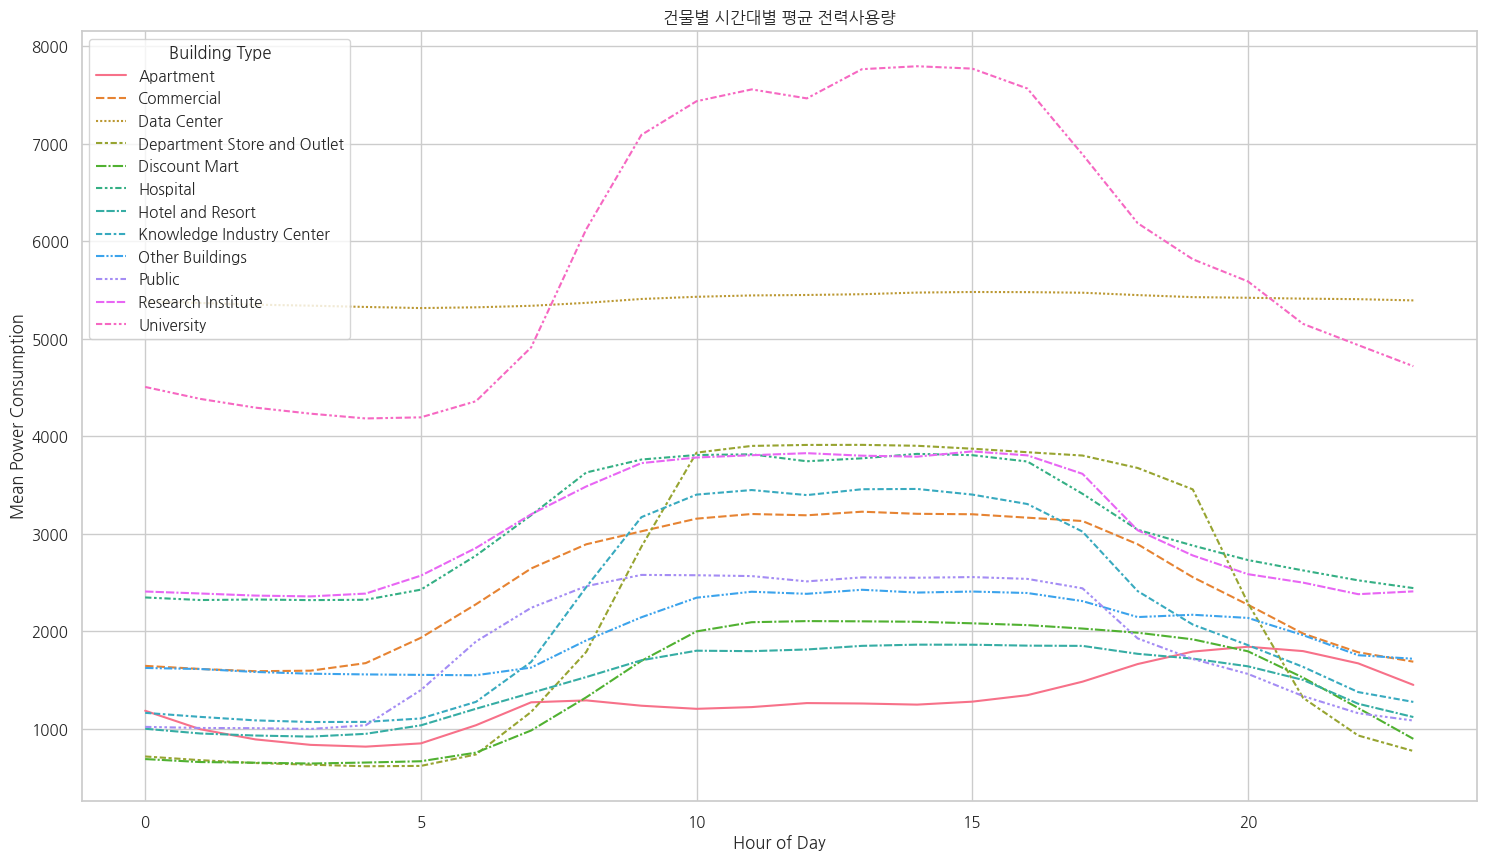

In [194]:
mean_power_by_hour_building = train_df[train_df['holiday'] == False].groupby(['hour', 'building_type'])['power_consumption'].mean().reset_index()

pivot_df = mean_power_by_hour_building.pivot(index='hour', columns='building_type', values='power_consumption')

plt.figure(figsize=(18, 10))
sns.lineplot(data=pivot_df)
plt.title('건물별 시간대별 평균 전력사용량')
plt.xlabel('Hour of Day')
plt.ylabel('Mean Power Consumption')
plt.legend(title='Building Type')
plt.show()
# 휴일 제외

1. Data Center 의 경우 일정한 전력사용량을 보여줌
2. University에서 매우 큰 전력사용량을 보여줌
3. Apartment를 제외한 대부분의 건물은 주 활동 시간대 (08 ~ 18)에 조금 더 높은 전력사용량을 보여줌
4. Apartment의 경우 퇴근 이후 (18~)에 전력사용량이 늘어나는 것을 확인할 수 있음

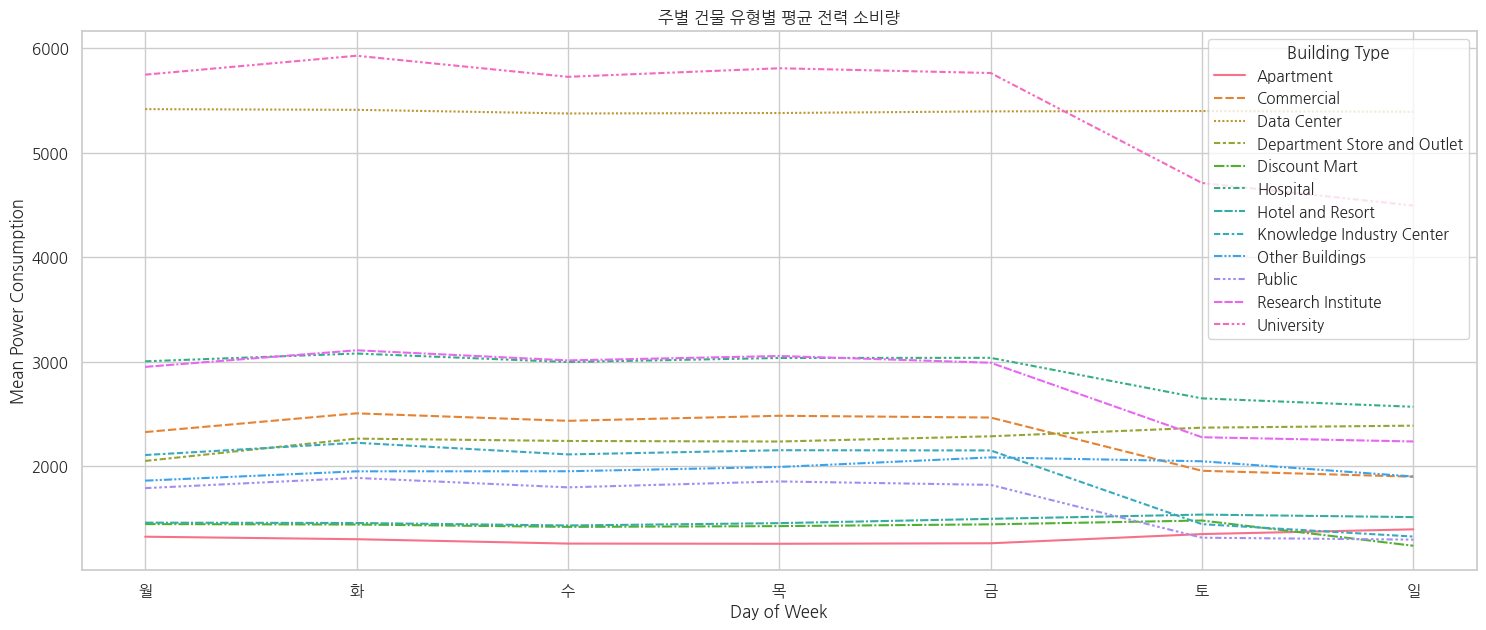

In [193]:
mean_power_by_day_building = train_df.groupby(['day_of_week', 'building_type'])['power_consumption'].mean().reset_index()

pivot_df_day = mean_power_by_day_building.pivot(index='day_of_week', columns='building_type', values='power_consumption')

day_names = ['월', '화', '수', '목', '금', '토', '일']
pivot_df_day.index = day_names

plt.figure(figsize=(18, 7))
sns.lineplot(data=pivot_df_day)
plt.title('주별 건물 유형별 평균 전력 소비량')
plt.xlabel('Day of Week')
plt.ylabel('Mean Power Consumption')
plt.legend(title='Building Type')
plt.show()

Universiry, Research Institute 등, 주말에 전력사용량이 줄어드는 건물들을 확인할 수 있고
Apartment와 같이 주말에 전력사용량이 늘어나는 건물들을 확인할 수 있다

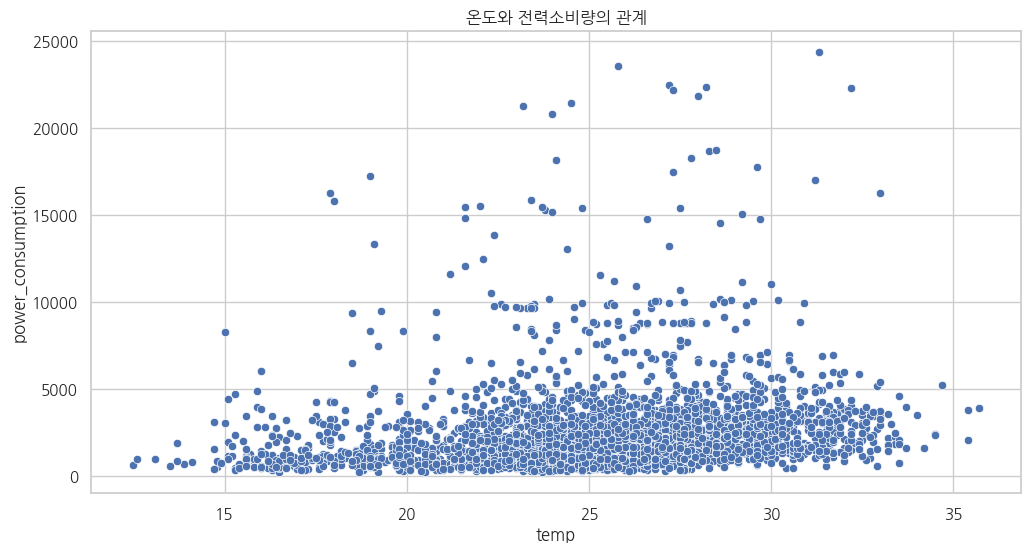

In [227]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='temp', y='power_consumption', data=train_df[train_df['holiday'] == False].sample(3000))
plt.title('온도와 전력소비량의 관계')
plt.show()

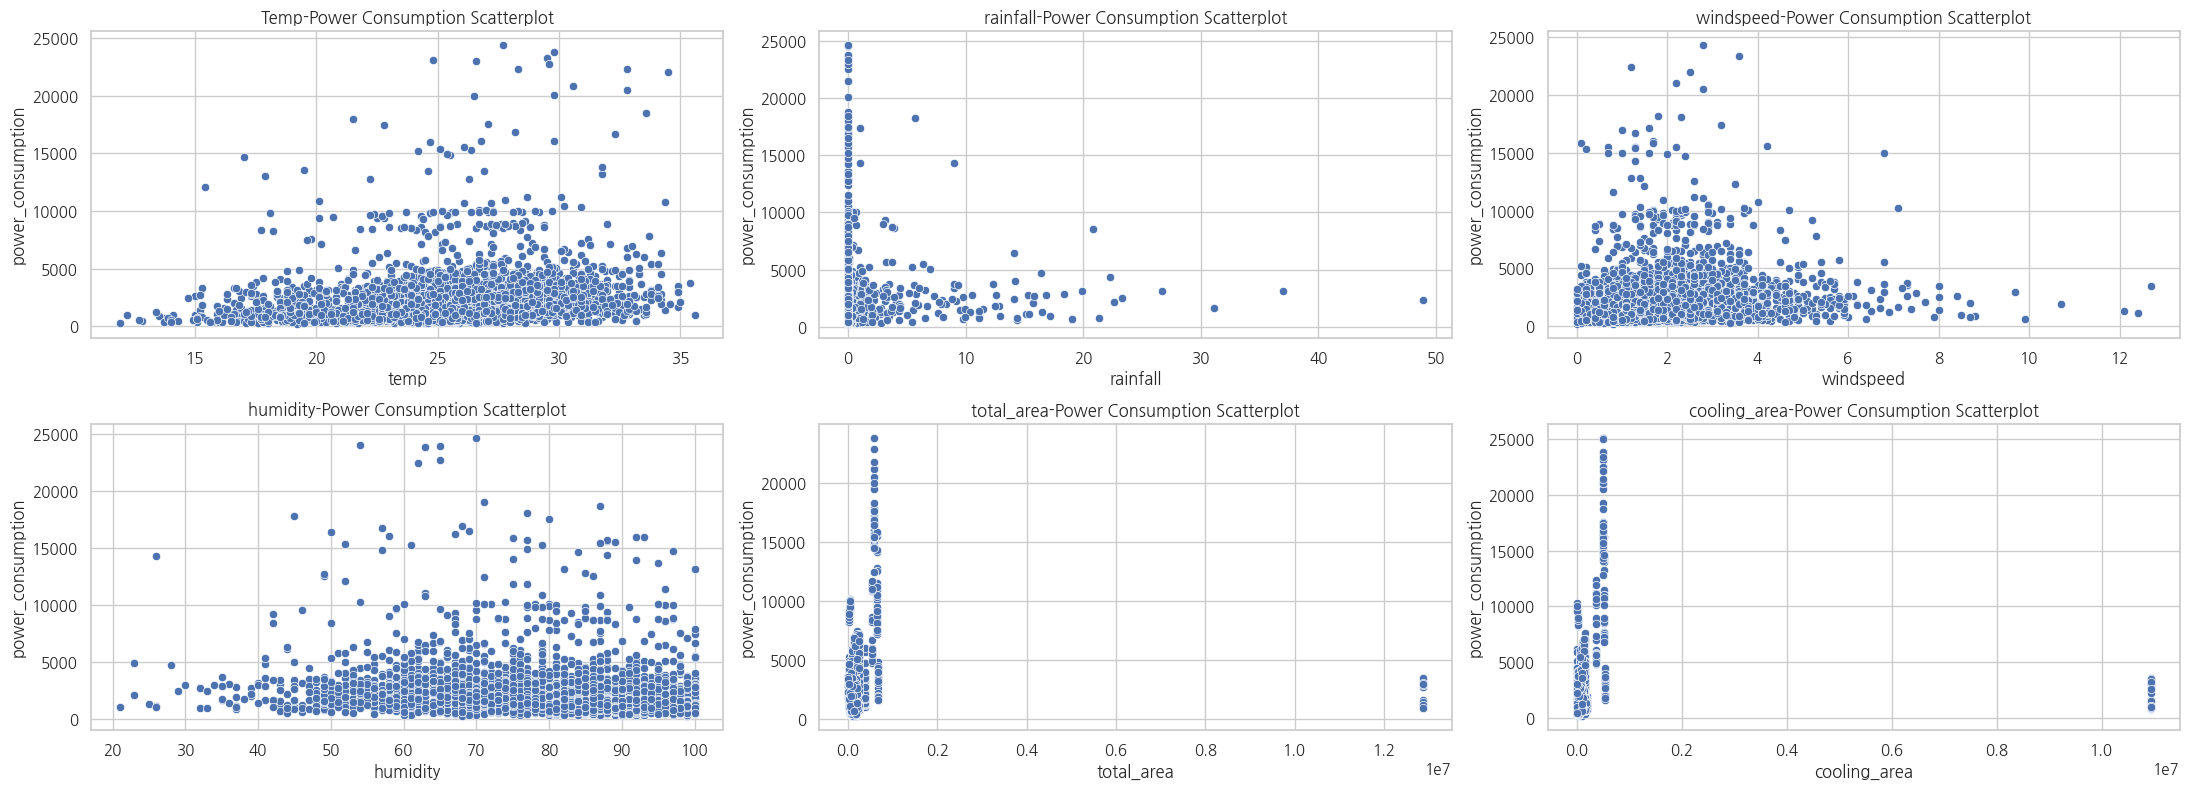

In [256]:
# 수치형 변수 별 전력사용량 관계
fig, axs = plt.subplots(2, 3, figsize=(22, 8))

sns.scatterplot(x='temp', y='power_consumption', data=train_df.sample(3000), ax=axs[0,0])
axs[0,0].set_title('Temp-Power Consumption Scatterplot')
sns.scatterplot(x='rainfall', y='power_consumption', data=train_df.sample(3000), ax=axs[0,1])
axs[0,1].set_title('rainfall-Power Consumption Scatterplot')
sns.scatterplot(x='windspeed', y='power_consumption', data=train_df.sample(3000), ax=axs[0,2])
axs[0,2].set_title('windspeed-Power Consumption Scatterplot')
sns.scatterplot(x='humidity', y='power_consumption', data=train_df.sample(3000), ax=axs[1,0])
axs[1,0].set_title('humidity-Power Consumption Scatterplot')
sns.scatterplot(x='total_area', y='power_consumption', data=train_df.sample(3000), ax=axs[1,1])
axs[1,1].set_title('total_area-Power Consumption Scatterplot')
sns.scatterplot(x='cooling_area', y='power_consumption', data=train_df.sample(3000), ax=axs[1,2])
axs[1,2].set_title('cooling_area-Power Consumption Scatterplot')

plt.tight_layout()
plt.show()

EDA 끝